# Refining Data Collection for Predicting Mushroom Toxicity

### Exploratory Data Analysis

We imported our data and had a thourough look at it to understand its shape and the variables it has.

In [ ]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Fetching dataset
mushroom = fetch_ucirepo(id=73)

In [ ]:
#Data (as pandas dataframes)
X = mushroom.data.features.reset_index()
y = mushroom.data.targets.reset_index()

In [ ]:
X.head()

,index,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,2,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,3,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,4,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
y.head()

,index,poisonous
0,0,p
1,1,e
2,2,e
3,3,p
4,4,e


In [ ]:
mushrooms = pd.merge(X, y, left_index=True, right_index=True)
X.drop('index', axis=1, inplace=True)
y.drop('index', axis=1, inplace=True)

In [ ]:
mushrooms.shape

(8124, 25)

In [ ]:
mushrooms.head()

,index_x,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,index_y,poisonous
0,0,x,s,n,t,p,f,c,n,k,...,w,p,w,o,p,k,s,u,0,p
1,1,x,s,y,t,a,f,c,b,k,...,w,p,w,o,p,n,n,g,1,e
2,2,b,s,w,t,l,f,c,b,n,...,w,p,w,o,p,n,n,m,2,e
3,3,x,y,w,t,p,f,c,n,n,...,w,p,w,o,p,k,s,u,3,p
4,4,x,s,g,f,n,f,w,b,k,...,w,p,w,o,e,n,a,g,4,e


In [ ]:
mushrooms.drop(['index_x','index_y'], axis=1, inplace=True)

In [ ]:
mushroom.variables

,name,role,type,demographic,description,units,missing_values
0,poisonous,Target,Categorical,None,None,None,no
1,cap-shape,Feature,Categorical,None,"bell=b,conical=c,convex=x,flat=f, knobbed=k,su...",None,no
2,cap-surface,Feature,Categorical,None,"fibrous=f,grooves=g,scaly=y,smooth=s",None,no
3,cap-color,Feature,Binary,None,"brown=n,buff=b,cinnamon=c,gray=g,green=r, pink...",None,no
4,bruises,Feature,Categorical,None,"bruises=t,no=f",None,no
5,odor,Feature,Categorical,None,"almond=a,anise=l,creosote=c,fishy=y,foul=f, mu...",None,no
6,gill-attachment,Feature,Categorical,None,"attached=a,descending=d,free=f,notched=n",None,no
7,gill-spacing,Feature,Categorical,None,"close=c,crowded=w,distant=d",None,no
8,gill-size,Feature,Categorical,None,"broad=b,narrow=n",None,no
9,gill-color,Feature,Categorical,None,"black=k,brown=n,buff=b,chocolate=h,gray=g, gre...",None,no


We plotted the distributions for all the columns to see how the data was spread along the different variables.

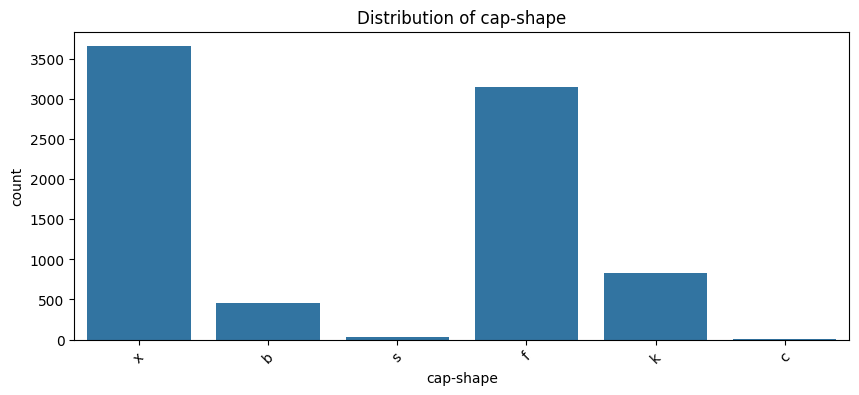

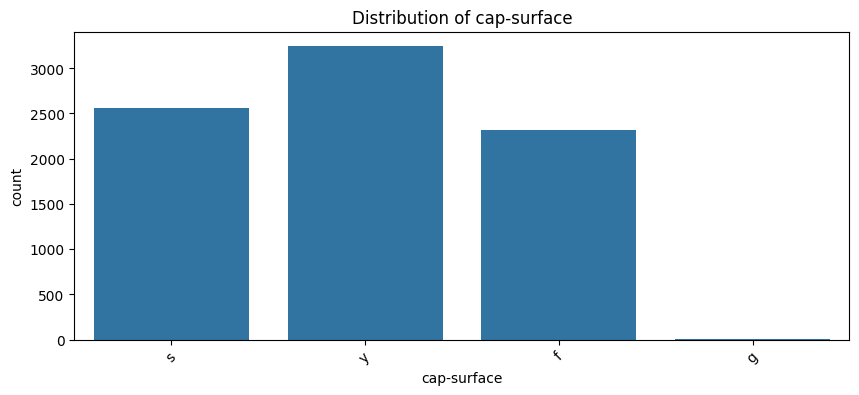

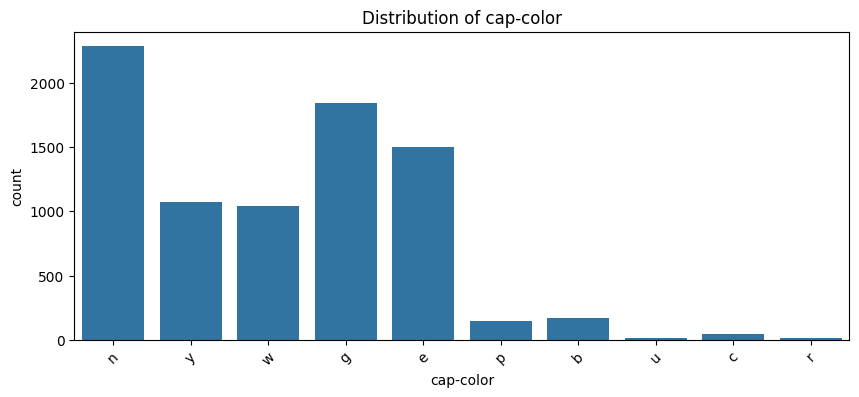

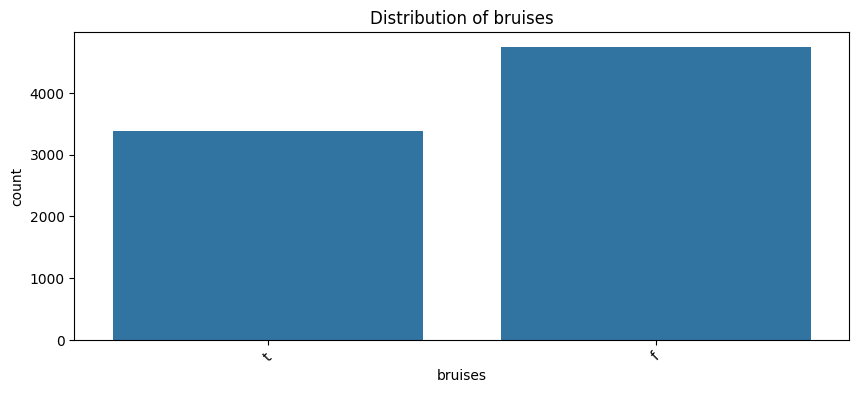

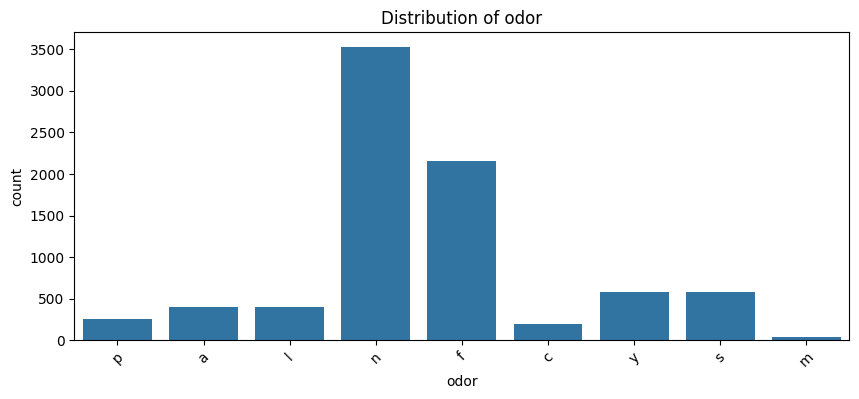

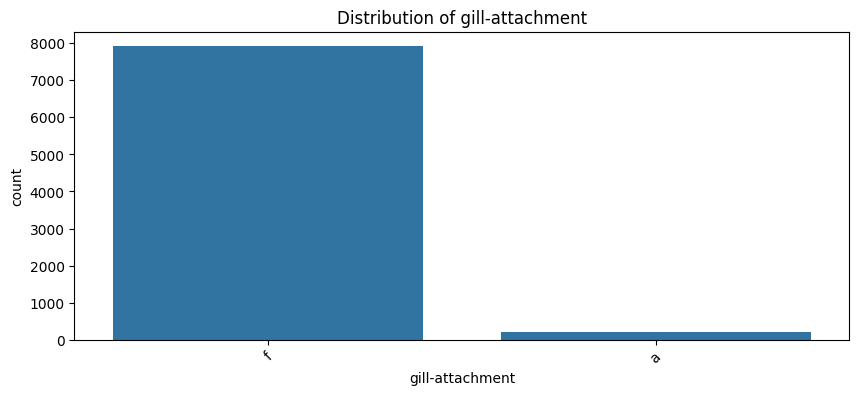

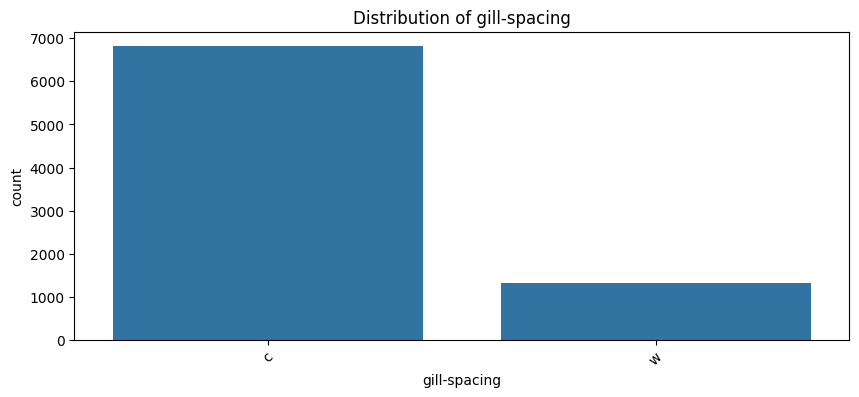

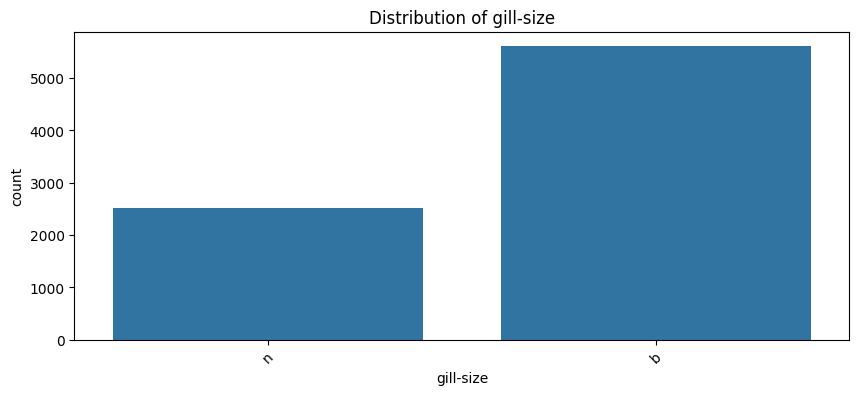

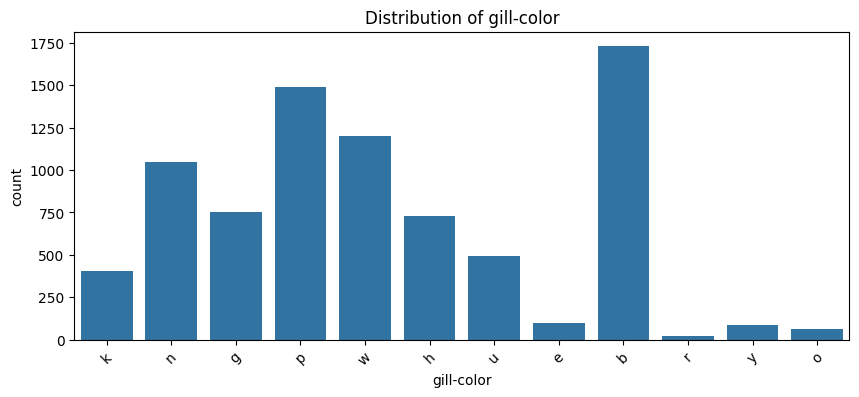

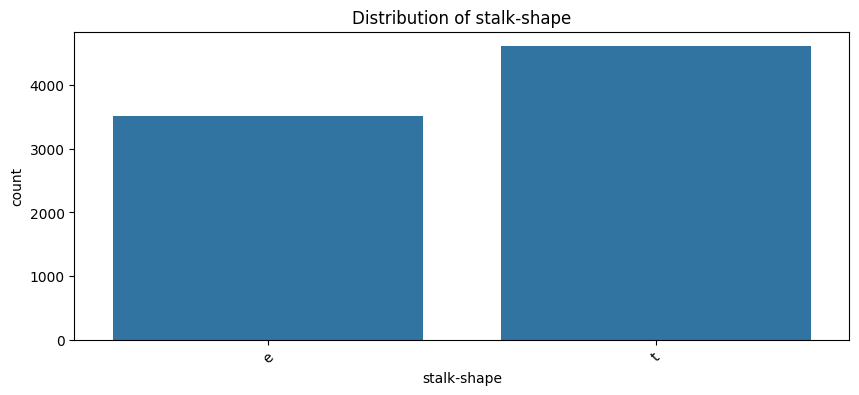

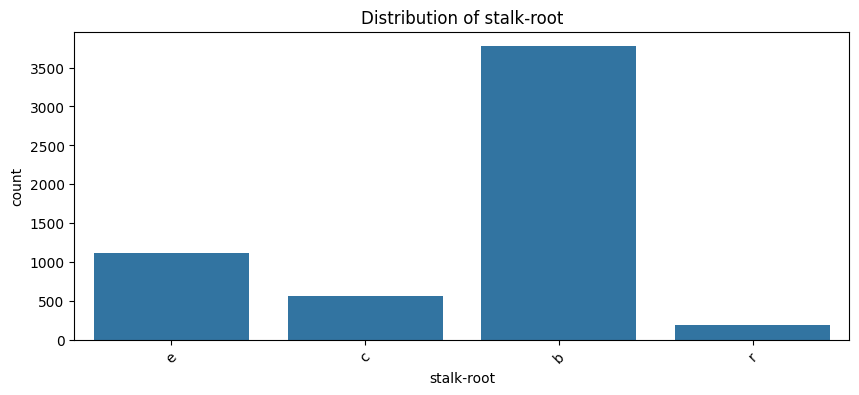

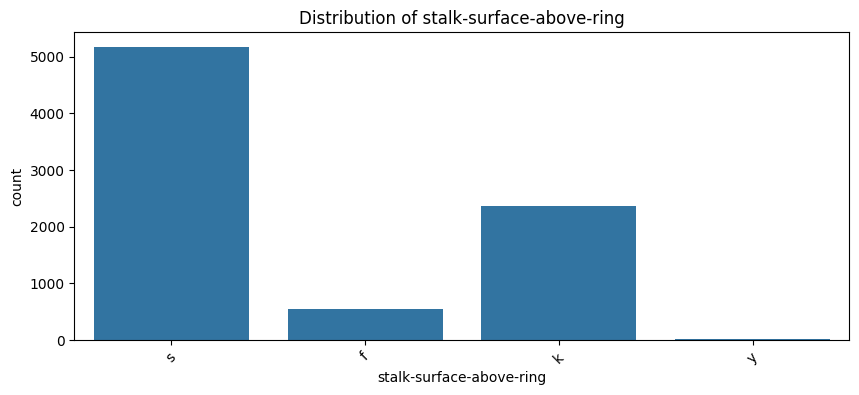

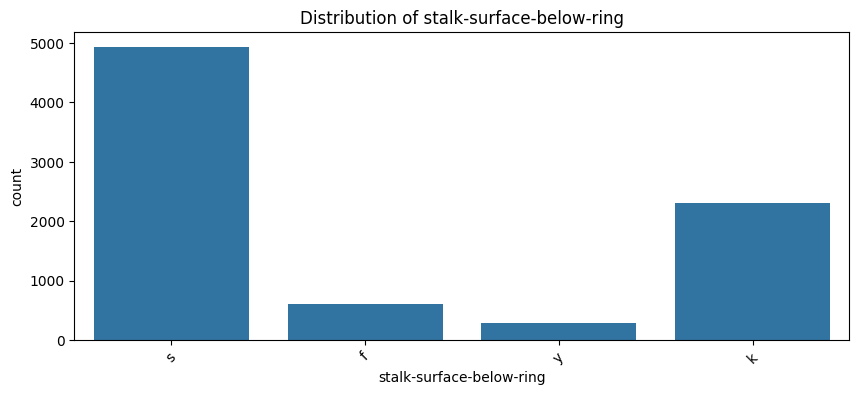

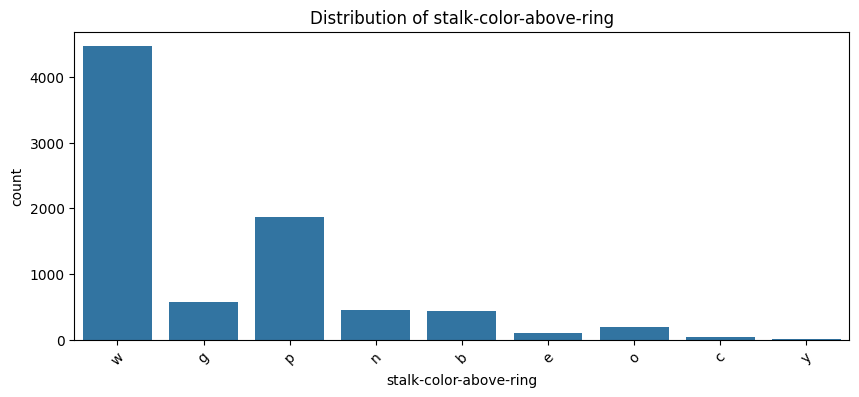

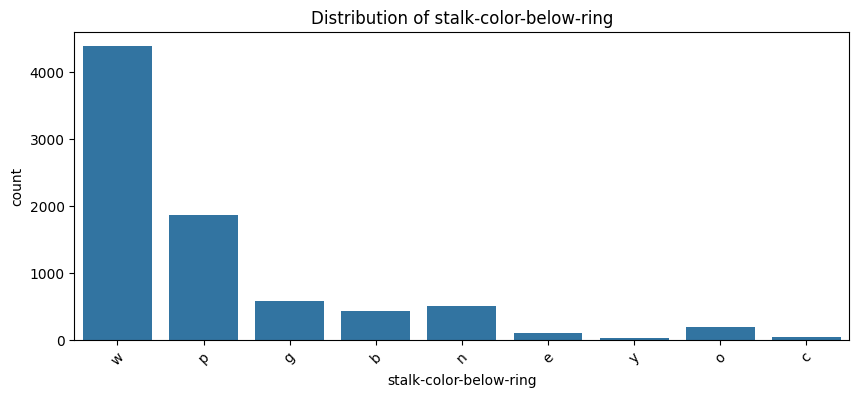

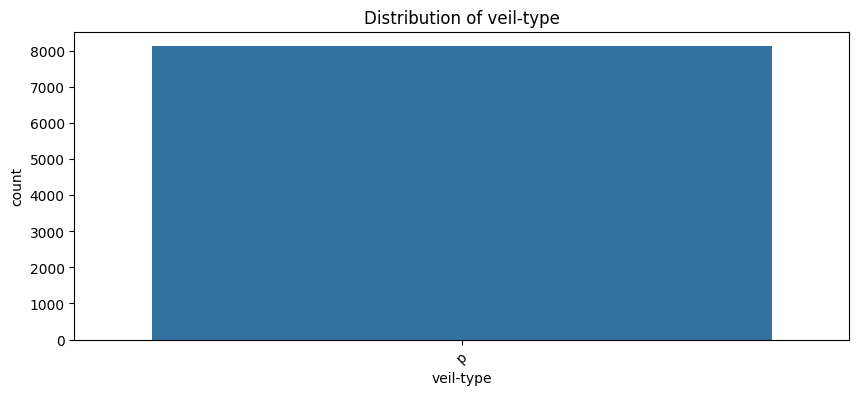

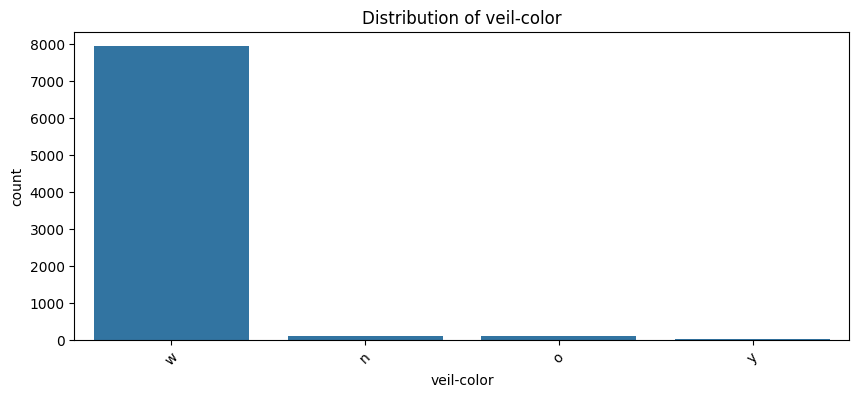

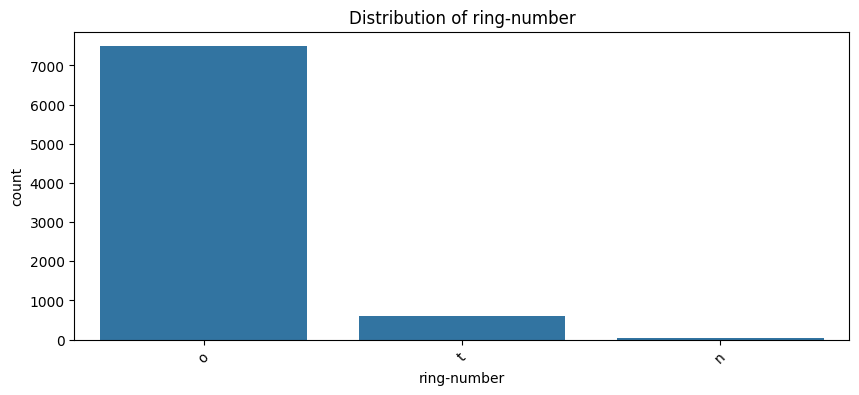

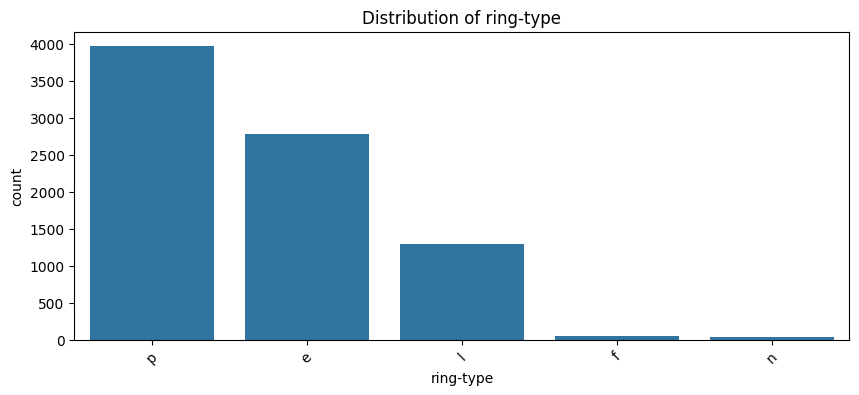

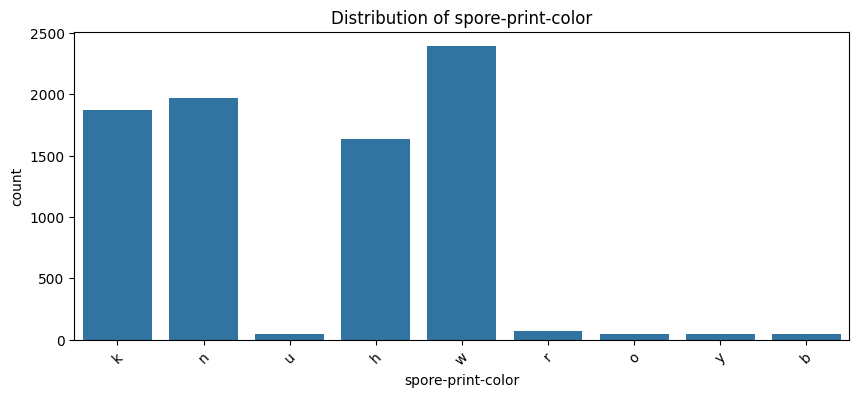

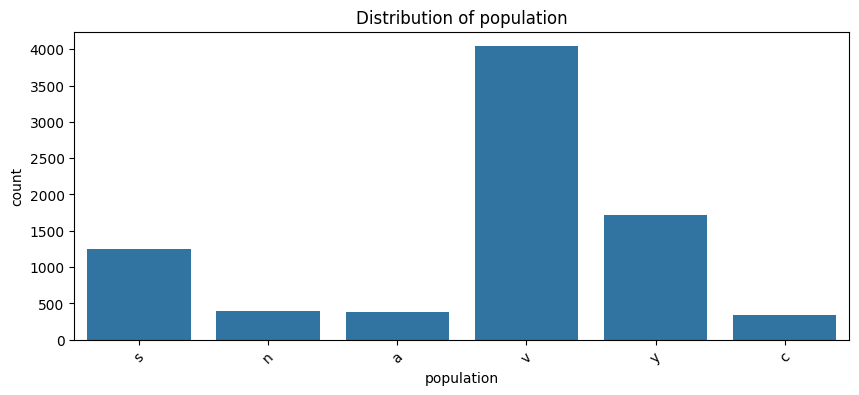

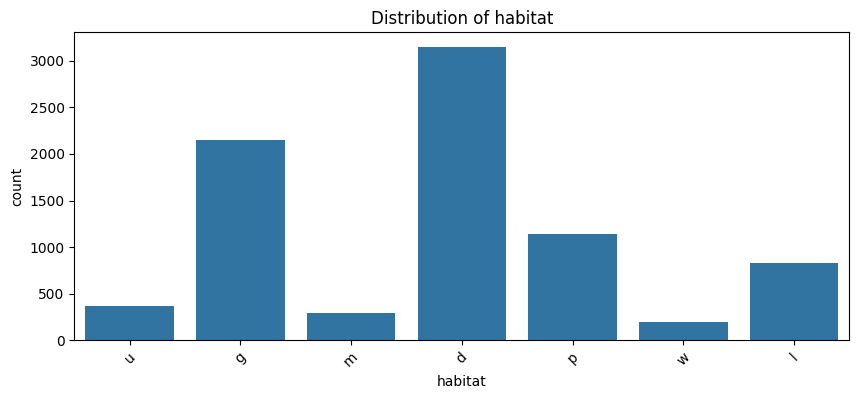

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df'
# Replace 'df' with the name of your DataFrame

for column in X.columns:
    # For a count plot
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=X)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)  # Rotate labels if they overlap
    plt.show()

We plotted the relation between different features and the target variable to see if we could find any interesting relationships.

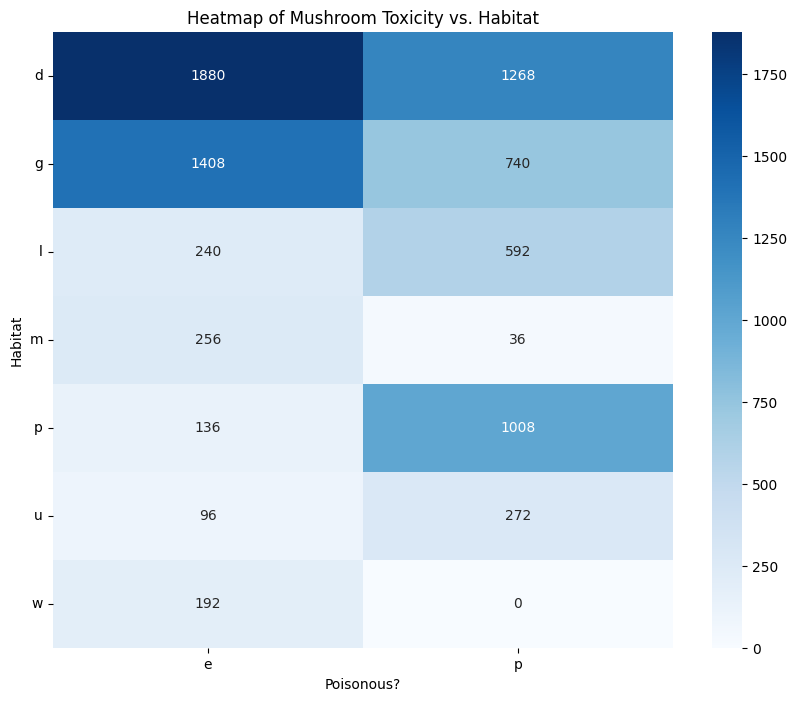

In [ ]:
crosstab = pd.crosstab( mushrooms['habitat'], mushrooms['poisonous'])
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Poisonous?')
plt.ylabel('Habitat')
plt.title('Heatmap of Mushroom Toxicity vs. Habitat')
plt.yticks(rotation=0)
plt.show()

Here we find that habitat w has no poisonous mushrooms, while habitat p has a majority of poisonous mushrooms.

<Axes: xlabel='poisonous'>

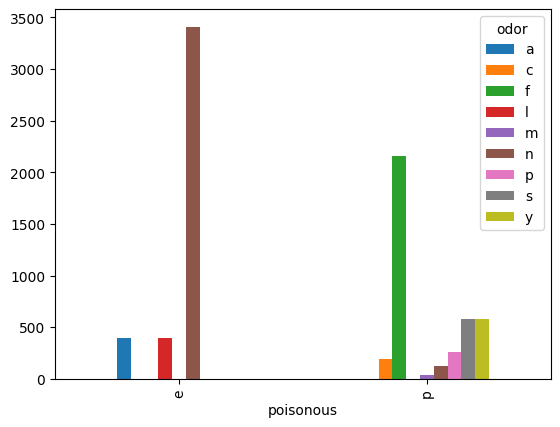

In [ ]:
pd.crosstab(y["poisonous"],X["odor"]).plot(kind='bar')

Here we see that odors a, l and n are coming from edible mushrooms while the other odors are poisonous.

<Axes: xlabel='poisonous'>

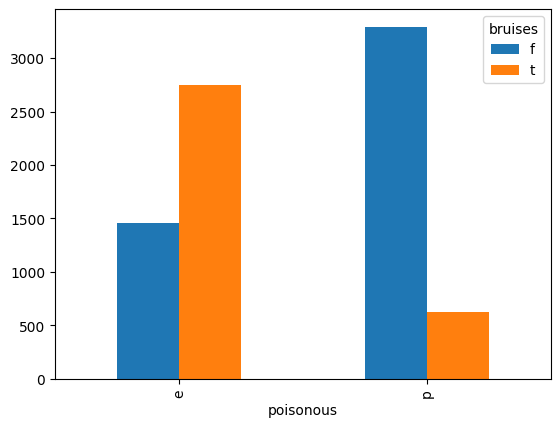

In [ ]:
pd.crosstab(y["poisonous"],X["bruises"]).plot(kind='bar')

f type bruises are ususally present in poisonous mushrooms

<Axes: xlabel='poisonous'>

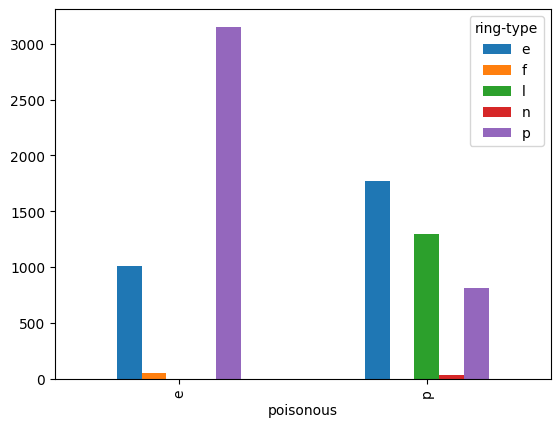

In [ ]:
pd.crosstab(y["poisonous"],X["ring-type"]).plot(kind='bar')

<Axes: xlabel='poisonous'>

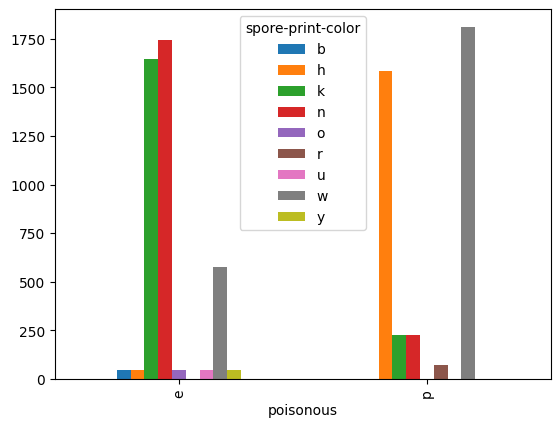

In [ ]:
pd.crosstab(y["poisonous"],X["spore-print-color"]).plot(kind='bar')

<Axes: xlabel='poisonous'>

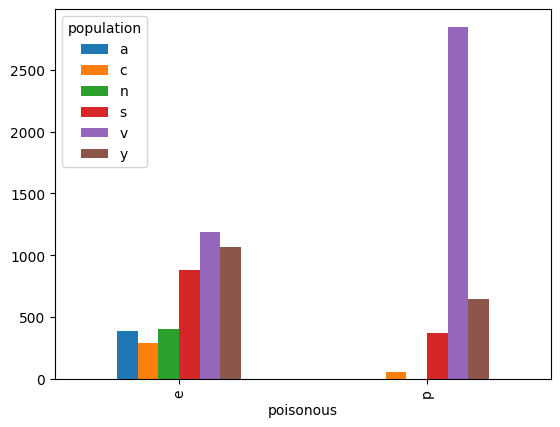

In [ ]:
pd.crosstab(y["poisonous"],X["population"]).plot(kind='bar')

<Axes: xlabel='poisonous'>

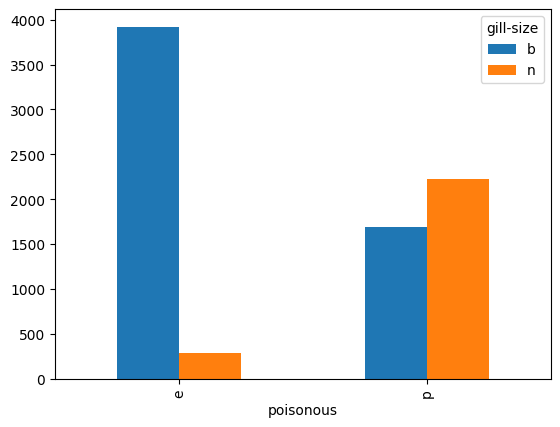

In [ ]:
pd.crosstab(y["poisonous"],X["gill-size"]).plot(kind='bar')

<Axes: xlabel='poisonous'>

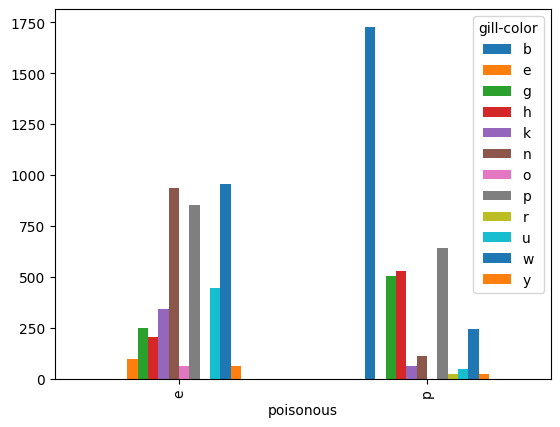

In [ ]:
pd.crosstab(y["poisonous"],X["gill-color"]).plot(kind='bar')

From the above graphs we can see interesting relationships between different features and the target, with a lot of features that seem to have a relation with the target variable, we now look at the correlation between them.

In [ ]:
df = pd.get_dummies(mushrooms)

# Calculate the correlation matrix
corr = df.corr()

correlations = corr['poisonous_p'].sort_values(ascending=False)

In [ ]:
correlations.head(10)

poisonous_p                   1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size_n                   0.540024
gill-color_b                  0.538808
bruises_f                     0.501530
spore-print-color_h           0.490229
ring-type_l                   0.451619
population_v                  0.443722
Name: poisonous_p, dtype: float64

In [ ]:
correlations.tail(10)

spore-print-color_k          -0.396832
spore-print-color_n          -0.416645
stalk-surface-below-ring_s   -0.425444
stalk-surface-above-ring_s   -0.491314
bruises_t                    -0.501530
gill-size_b                  -0.540024
ring-type_p                  -0.540469
odor_n                       -0.785557
poisonous_e                  -1.000000
veil-type_p                        NaN
Name: poisonous_p, dtype: float64

Here we see a high positive correlation woth odor_f, stalk-surface-above-ring_k, stalk-surface-below-ring_k, and gill-size_n and a high negative correlation with gill-size_b, ring-type_p, and odor_n.

## Preprocessing

check columns that contains one variable

In [ ]:
single_value_columns = []

for column in mushrooms.columns:
  if mushrooms[column].nunique() == 1:
    single_value_columns.append(column)


mushrooms.drop(single_value_columns, axis = 1, inplace = True)

handling null values.

In [ ]:
mushrooms.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [ ]:
mushrooms['stalk-root'].value_counts()

stalk-root
b    3776
e    1120
c     556
r     192
Name: count, dtype: int64

In [ ]:
mushrooms['stalk-root'] = mushrooms['stalk-root'].fillna('unknown')

Checking balance for the target variable

In [ ]:
# The target variables are well balanced
y['poisonous'].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

label encoding the categorical columns

In [ ]:
X=mushrooms.drop(columns="poisonous")
y=mushrooms['poisonous']

In [ ]:
X.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [ ]:
X.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
le = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=900)
rfe = RFE(model, n_features_to_select=6)
RFE_X_Train = rfe.fit_transform(X_train_scaled,y_train)
model.fit(X_train_scaled,y_train) 
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ")
colcheck = pd.Series(rfe.support_,index = list(X.columns))
selected_features = colcheck[colcheck==True].index
print(selected_features)

Number of Features:  6
Selected Features: 
Index(['odor', 'gill-size', 'gill-color', 'ring-type', 'spore-print-color',
       'population'],
      dtype='object')


In [ ]:
X_filtered = X.filter(items=selected_features)

In [ ]:
X_filtered.head(5)

,odor,gill-size,gill-color,ring-type,spore-print-color,population
0,6,1,4,4,2,3
1,0,0,4,4,3,2
2,3,0,5,4,3,2
3,6,1,5,4,2,3
4,5,0,4,0,3,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
sgdClf = SGDClassifier()

5-Fold Cross Validation F1 Scores: [0.9161801  0.90772072 0.89925851 0.91848124 0.89673924]
Mean F1 Score: 0.907675961536673


In [ ]:
logReg = LogisticRegression()

5-Fold Cross Validation F1 Scores: [0.89458446 0.90074741 0.89386878 0.90151325 0.89755699]
Mean F1 Score: 0.8976541792643907


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')


5-Fold Cross Validation F1 Scores: [0.9169018  0.91308357 0.90693438 0.91995293 0.91371118]
Mean F1 Score: 0.9141167722001521


In [ ]:
cv_scores_sgdClf = cross_val_score(sgdClf, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
print("5-Fold Cross Validation F1 Scores for SGDC:", cv_scores_sgdClf)
print("Mean F1 Score for SGDC:", cv_scores_sgdClf.mean())

print('\n')

cv_scores_logReg = cross_val_score(logReg, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
print("5-Fold Cross Validation F1 Scores for Logistic Regression:", cv_scores_logReg)
print("Mean F1 Score for Logistic Regression:", cv_scores_logReg.mean())

print('\n')

cv_scores_svc = cross_val_score(svc, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
print("5-Fold Cross Validation F1 Scores for SVC:", cv_scores_svc)
print("Mean F1 Score for SVC:", cv_scores_svc.mean())

5-Fold Cross Validation F1 Scores for SGDC: [0.9169018  0.91540705 0.90539991 0.91382409 0.91371118]
Mean F1 Score: 0.9130488075091311


5-Fold Cross Validation F1 Scores for Logistic Regression: [0.89458446 0.90074741 0.89386878 0.90151325 0.89755699]
Mean F1 Score: 0.8976541792643907


5-Fold Cross Validation F1 Scores for SVC: [0.9169018  0.91308357 0.90693438 0.91995293 0.91371118]
Mean F1 Score: 0.9141167722001521


# Imports

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Data Preparation

In [ ]:
edible_mushroom_s = pd.DataFrame(os.listdir("/home/azureuser/cloudfiles/code/edible-and-poisonous-fungi/edible mushroom sporocarp"))
edible_s = pd.DataFrame(os.listdir("/home/azureuser/cloudfiles/code/edible-and-poisonous-fungi/edible sporocarp"))
poison_mushroom_s = pd.DataFrame(os.listdir("/home/azureuser/cloudfiles/code/edible-and-poisonous-fungi/poisonous mushroom sporocarp"))
poison_s = pd.DataFrame(os.listdir("/home/azureuser/cloudfiles/code/edible-and-poisonous-fungi/poisonous sporocarp"))

In [ ]:
edible_mushroom_s.rename(columns={0:'mushroom'},inplace=True)
edible_s.rename(columns={0:'mushroom'},inplace=True)
poison_mushroom_s.rename(columns={0:'mushroom'},inplace=True)
poison_s.rename(columns={0:'mushroom'},inplace=True)

In [ ]:
edible_mushroom_s['category'] = "0"
edible_s['category'] = "0"
poison_mushroom_s['category'] = "1"
poison_s['category'] = "1"

In [ ]:
edible_mushroom_s["mushroom"] = edible_mushroom_s["mushroom"].apply(lambda x: "edible mushroom sporocarp/"+x)
edible_s["mushroom"] = edible_s["mushroom"].apply(lambda x: "edible sporocarp/"+x)
poison_mushroom_s["mushroom"] = poison_mushroom_s["mushroom"].apply(lambda x: "poisonous mushroom sporocarp/"+x)
poison_s["mushroom"] = poison_s["mushroom"].apply(lambda x: "poisonous sporocarp/"+x)

In [ ]:
mush_df = pd.concat([edible_mushroom_s,edible_s, poison_mushroom_s, poison_s])

#mush_df = mush_df.drop([0,1]).reset_index().drop(["index"], axis=1)

# Data Preprocessing

In [ ]:
IMAGE_SIZE = 224
batch_size = 25
df_majority = mush_df[mush_df['category'] == '1']
df_minority = mush_df[mush_df['category'] == '0']


df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=len(df_minority),     
                                   random_state=123) 


df_balanced = pd.concat([df_majority_downsampled, df_minority])


df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

# Image Data Generator Configuration

In [ ]:
train_df, val_df = train_test_split(df_balanced, test_size=0.2, random_state=42)

images_directory = '/home/azureuser/cloudfiles/code/edible-and-poisonous-fungi'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=images_directory, 
    x_col='mushroom', 
    y_col='category',  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=batch_size,
    class_mode='binary'
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,)
validation_generator = valid_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=images_directory,
    x_col='mushroom',
    y_col='category',  
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    batch_size=batch_size,
    class_mode='binary'
)

# Model Preparation

In [ ]:
handle_base = "mobilenet_v2"
MODULE_HANDLE = "https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
feature_extractor = hub.KerasLayer(MODULE_HANDLE, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
feature_extractor.trainable = False


tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Training

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=val_df.shape[0]//batch_size,
    steps_per_epoch=train_df.shape[0]//batch_size)

# Performance Visualization

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the Model

In [ ]:
model.save('model2.h5')